In [3]:
import tensorflow as tf
from tensorflow.keras.layers import Layer, Dense
from tensorflow.keras import Model

class H0Layer(Layer):
    def call(self, inputs):
        return tf.ones_like(inputs)

class H1Layer(Layer):
    def call(self, inputs):
        return 2 * inputs

class H2Layer(Layer):
    def call(self, inputs):
        return 4 * tf.square(inputs) - 2
    
class H3Layer(Layer):
    def call(self,inputs):
        return 8 * tf.pow(inputs,3) - 12 * inputs
    
class H4Layer(Layer):
    def call(self,inputs):
        return 16 * tf.pow(inputs,4) - 48 * tf.square(inputs) + 12

class MyModel(Model):
    def __init__(self):
        super(MyModel, self).__init__()
        self.h0 = H0Layer()
        self.h1 = H1Layer()
        self.h2 = H2Layer()
        self.h3 = H3Layer()
        self.h4 = H4Layer()
        self.combination = Dense(1, use_bias=False)
        #self.dense1 = Dense(128, activation='relu')
        self.dense1 = Dense(128)
        #self.dense2 = Dense(64, activation='relu')
        self.dense2 = Dense(64)
        self.dense3 = Dense(1)

    def call(self, inputs):
        h0 = self.h0(inputs)
        h1 = self.h1(inputs)
        h2 = self.h2(inputs)
        h3 = self.h3(inputs)
        h4 = self.h4(inputs)
        combined = tf.concat([h0, h1, h2,h3,h4], axis=-1)
        x = self.combination(combined)
        x = self.dense1(x)
        x = self.dense2(x)
        return self.dense3(x)

# Create an instance of the model
model = MyModel()

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), loss='mean_squared_error')

# Create the training data
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

np.random.seed(42)
n_samples = 10000
lower_bound = -2 * np.pi
upper_bound = 2 * np.pi
X = np.random.uniform(lower_bound, upper_bound, size=(n_samples, 1))
y = np.cos(X)

# Normalize the inputs
#scaler = MinMaxScaler()
#X = scaler.fit_transform(X)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model.fit(X_train, y_train, epochs=300, batch_size=32, validation_data=(X_val, y_val))

# Evaluate the model
x_test = np.linspace(lower_bound, upper_bound, 1000).reshape(-1, 1)
y_test = np.cos(x_test)

# Normalize the test data using the same scaler
#x_test = scaler.transform(x_test.reshape(-1, 1))
#y_test = y_test.reshape(-1, 1)

print("Model Evaluation:", model.evaluate(x_test, y_test))


Epoch 1/300
250/250 [==============================] - 1s 1ms/step - loss: 280243.1562 - val_loss: 0.4653
Epoch 2/300
250/250 [==============================] - 0s 827us/step - loss: 0.4387 - val_loss: 0.4624
Epoch 3/300
250/250 [==============================] - 0s 853us/step - loss: 0.4335 - val_loss: 0.4552
Epoch 4/300
250/250 [==============================] - 0s 821us/step - loss: 0.4281 - val_loss: 0.4469
Epoch 5/300
250/250 [==============================] - 0s 785us/step - loss: 0.4217 - val_loss: 0.4397
Epoch 6/300
250/250 [==============================] - 0s 807us/step - loss: 0.4157 - val_loss: 0.4327
Epoch 7/300
250/250 [==============================] - 0s 799us/step - loss: 0.4105 - val_loss: 0.4276
Epoch 8/300
250/250 [==============================] - 0s 787us/step - loss: 0.4046 - val_loss: 0.4273
Epoch 9/300
250/250 [==============================] - 0s 803us/step - loss: 0.4004 - val_loss: 0.4156
Epoch 10/300
250/250 [==============================] - 0s 799us/step 

Validation loss: 0.21410627663135529
32/32 [==============================] - 0s 560us/step


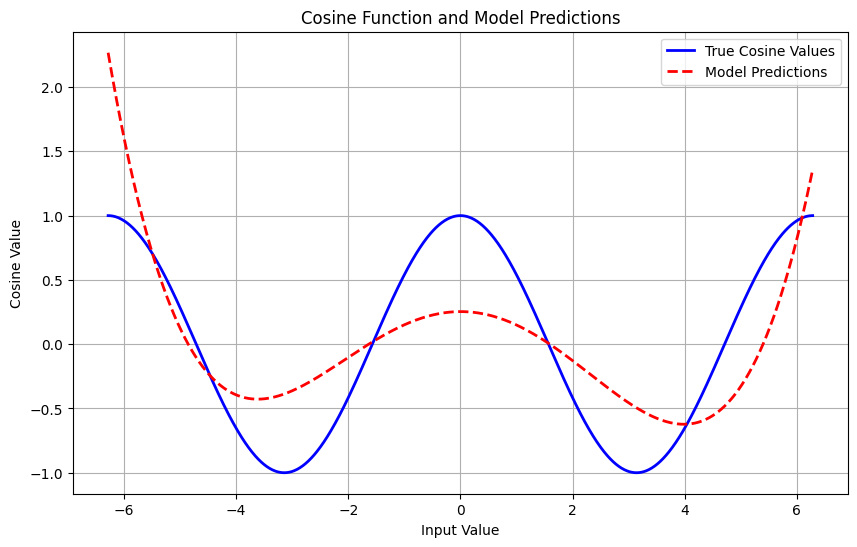

In [2]:
val_loss = model.evaluate(X_val, y_val, verbose=0)
print(f"Validation loss: {val_loss}")

import matplotlib.pyplot as plt

num_test_samples = 1000
X_test = np.linspace(lower_bound, upper_bound, num=num_test_samples).reshape(-1, 1)
y_true = np.cos(X_test)
y_pred = model.predict(X_test)

plt.figure(figsize=(10, 6))
plt.plot(X_test, y_true, label='True Cosine Values', color='b', linewidth=2)
plt.plot(X_test, y_pred, label='Model Predictions', color='r', linestyle='--', linewidth=2)
plt.xlabel('Input Value')
plt.ylabel('Cosine Value')
plt.title('Cosine Function and Model Predictions')
plt.legend()
plt.grid()
plt.show()
